# Chương 06. Seam Carving

- Trong chương này, chúng ta sẽ tìm hiểu về việc thay đổi kích thước hình ảnh có nội dung được biết trước, còn được gọi là **seam carving**. 
- Chúng ta sẽ thảo luận về **cách phát hiện** các phần **nổi bậc (interesting partss)** trong một hình ảnh và cách sử dụng thông tin đó để **thay đổi kích thước** của một hình ảnh nhất định mà **không làm giảm chất lượng của các yếu tố nổi bậc đó**.

### Đến cuối chương này, bạn sẽ biết:
- What content awareness ?
- Cách định lượng và xác định các phần nổi bậc (interesting parts) trong ảnh
- Cách sử dụng huy hoạch động (dynamic programming) để phân tích nội dung hình ảnh
- Cách tăng và giảm chiều rộng của hình ảnh mà không làm xấu đi khu vực nổi bậc trong khi giữ cho chiều cao không đổi
- Làm thế nào để làm cho một đối tượng biến mất khỏi một hình ảnh

## Nội dung:
1. **Why do we care about seam carving ?**
2. **How does it work ?**
3. **How do we define interesting ?**
4. **How do we compute the seams?**
5. **Can we expand an image?**
6. **Can we remove an object completely?**

## 1. Why do we care about seam carving ?

- Trước khi chúng ta bắt đầu thảo luận về seam carving, chúng ta cần phải hiểu tại sao nó cần thiết ở đây cái đã.
- Tại sao chúng ta nên quan tâm đến nội dung hình ảnh ? Tại sao chúng ta không thể thay đổi kích thước hình ảnh đã cho và di chuyển nó với cuộc sống của mình ? Hãy xem hình ảnh dưới đây:

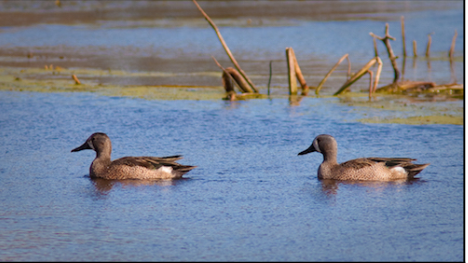

- Bây giờ, giả sử chúng ta muốn giảm chiều rộng của hình ảnh này trong khi vẫn giữ chiều cao không đổi. Nếu chúng ta làm điều đó, nó sẽ trông giống như thế này:

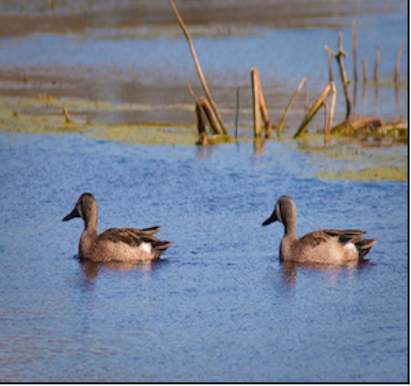

- Như bạn có thể thấy, những con vịt trong ảnh trông như bị lệch, và có sự xuống cấp về chất lượng chung của hình ảnh. Nói một cách trực giác, chúng ta có thể nói rằng những con vịt là những phần nổi bậc (interesting parts) trong hình ảnh.
- Vì vậy, khi chúng ta **thay đổi kích thước ảnh**, chúng tôi muốn **những con vịt còn nguyên vẹn**. Vì vậy, seam carving được apply vào trong trường hợp này. Sử dụng seam carving, chúng ta có thể **phát hiện các vùng nổi bậc này và đảm bảo chúng không bị thay đổi.**

## 2. How does it work ?

- Chúng ta đã nói về việc thay đổi kích thước hình ảnh và cách chúng ta xem xét nội dung của hình ảnh khi chúng ta thay đổi kích thước hình ảnh. 
- Vậy tại sao trên trái đất nó được gọi là seam carving ? Nó chỉ nên được gọi là thay đổi kích thước hình ảnh nhận biết nội dung, phải không ? Vâng, có nhiều thuật ngữ khác nhau được sử dụng để mô tả quá trình này, chẳng hạn như nhắm mục tiêu lại hình ảnh, chia tỷ lệ chất lỏng, khắc đường may, v.v. Nó được gọi là seam carving vì cách chúng ta thay đổi kích thước hình ảnh. Thuật toán được đề xuất bởi **Shai Avidan** và **Ariel Shamir**. Bạn có thể tham khảo giấy gốc tại: https://dl.acm.org/citation.cfm?id=1276390

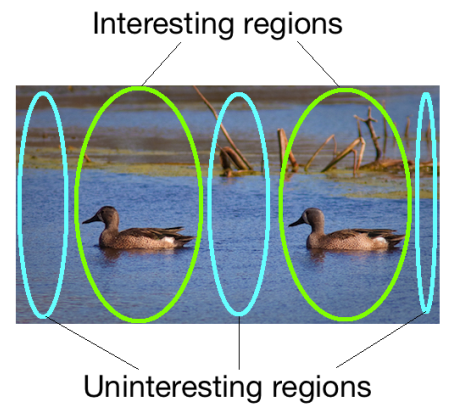

- Ở hình ảnh trên, chúng ta có thể thấy làm thế nào để phân chia hình ảnh thành các phần nổi bậc và không không nổi bậc. Chúng ta cần đảm bảo rằng thuật toán của chúng ta phát hiện các phần không nổi bậc này và xử lý chúng.
- Hãy xem xét hình ảnh của những con vịt và những hạn chế mà chúng ta gặp phải. Chúng ta muốn giữ chiều cao không đổi và giảm chiều rộng. Điều này có nghĩa là chúng ta cần tìm các đường nối dọc trong hình ảnh và loại bỏ chúng.
- Các đường nối này bắt đầu ở phía trên và kết thúc ở phía dưới (hoặc ngược lại). Nếu chúng ta đang xử lý thay đổi kích thước dọc, thì các đường nối sẽ bắt đầu ở phía bên trái và kết thúc ở bên phải. **Một seam carving chỉ là một loạt các pixel được kết nối bắt đầu ở hàng đầu tiên và kết thúc ở hàng cuối cùng của hình ảnh**.

## 3. How do we define interesting?

- Trước khi chúng ta bắt đầu tính toán seams, chúng ta cần tìm hiểu xem chúng ta sẽ sử dụng số liệu nào để tính toán chúng. Chúng ta cần một cách gán mức độ quan trọng cho từng pixel để có thể xác định các đường dẫn ít quan trọng nhất.
- Trong thuật ngữ thị giác máy tính, chúng ta nói rằng chúng ta cần gán giá trị **energy** cho từng pixel để có thể tìm thấy đường dẫn của **energy** tối thiểu. Đạt được một cách tốt để gán **energy** là rất quan trọng bởi vì nó sẽ ảnh hưởng đến chất lượng của đầu ra.

- Một trong những số liệu mà chúng ta có thể sử dụng là giá trị của đạo hàm tại mỗi điểm. Đây là một chỉ số tốt về mức độ hoạt động trong khu vực đó. 
- Nếu có một số hoạt động, thì các giá trị pixel sẽ thay đổi nhanh chóng, do đó giá trị của đạo hàm tại thời điểm đó sẽ cao. 
- Mặt khác, nếu các vùng đơn giản và không nổi bậc, thì các giá trị pixel sẽ không thay đổi nhanh chóng, do đó, giá trị của đạo hàm tại thời điểm đó trong ảnh thang độ xám sẽ thấp.

- Đối với mỗi vị trí pixel, chúng ta tính toán **energy** bằng cách **tính tổng các đạo hàm x và y tại điểm đó**. Chúng ta tính toán các giá trị đạo hàm bằng cách tính mức độ khác biệt giữa pixel hiện tại và các lân cận của nó.
- Nếu bạn còn nhớ, chúng ta đã làm một cái gì đó tương tự như thế này khi chúng ta thực hiện **phát hiện đường nét (detecting edge)** bằng **bộ lọc sobel** (Chương 02. Phát hiện các đường nét và áp dụng Bộ lọc hình ảnh).
- Khi chúng ta tính toán các giá trị này, chúng ta lưu trữ chúng trong một ma trận gọi là ma trận **energy**, sẽ được sử dụng để xác định các đường nối (seams).

## 4. How do we compute the seams?

- Khi ta có **energy matrix**, ta có thể tính toán các đường nối.
- Chúng ta cần tìm đường đi qua hình ảnh với ít **energy** nhất. Việc tính toán tất cả các đường dẫn có thể rất tốn kém, vì vậy chúng ta cần tìm ra một cách thông minh hơn để làm điều này. 
- Để đạt được việc tính toán nhanh trong tình huống này, ta sử dụng huy hoạch động. Trong thực tế,seam carving là một ứng dụng trực tiếp của **huy hoạch động (dynamic programming)**:

- Chúng ta cần bắt đầu với từng pixel ở hàng đầu tiên và tìm đường đến hàng cuối cùng. Để tìm đường dẫn ít energy nhất, chúng ta tính toán và lưu trữ các đường dẫn tốt nhất đến từng pixel trong một bảng.
- Khi chúng ta đã tạo bảng này, có thể tìm thấy đường dẫn đến một pixel cụ thể bằng cách quay lại qua các hàng trong bảng đó.

- Đối với mỗi pixel trong hàng hiện tại, chúng tôi tính toán energy của ba vị trí pixel có thể có trong hàng tiếp theo mà chúng tôi có thể di chuyển đến; đó là: dưới cùng bên trái, dưới cùng và dưới cùng bên phải. Chúng ta tiếp tục lặp lại quá trình này cho đến khi chúng tôi đạt đến đáy. 
- Khi chúng ta đạt đến đáy, chúng tôi lấy cái có giá trị tích lũy ít nhất và quay lại đường lên đỉnh. Điều này sẽ cho chúng ta con đường ít năng lượng nhất. Mỗi lần chúng ta loại bỏ một đường may, chiều rộng của hình ảnh sẽ giảm một pixel. Vì vậy, chúng ta cần tiếp tục loại bỏ các đường nối này cho đến khi chúng ta đạt được kích thước hình ảnh mong muốn.

- Đầu tiên, chúng ta sẽ viết các hàm để tính eneryg trong ảnh, xác định vị trí các đường nối của nó và vẽ chúng.
- Các hàm này sẽ được sử dụng dọc theo mọi đoạn code trước đó và nó có thể được bao gồm dưới dạng thư viện trong bất kỳ tùy chỉnh nào của bạn:

In [ ]:
# Draw vertical seam on top of the image
def overlay_vertical_seam(img, seam):
    img_seam_overlay = np.copy(img)
    # Extract the list of points from the seam
    x_coords, y_coords = np.transpose([(i,int(j)) for i,j in enumerate(seam)])
    # Draw a green line on the image using the list of points
    img_seam_overlay[x_coords, y_coords] = (0,255,0)
    return img_seam_overlay

# Compute the energy matrix from the input image
def compute_energy_matrix(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Compute X derivative of the image
    sobel_x = cv2.Sobel(gray,cv2.CV_64F, 1, 0, ksize=3)
    
    # Compute Y derivative of the image
    sobel_y = cv2.Sobel(gray,cv2.CV_64F, 0, 1, ksize=3)
    
    abs_sobel_x = cv2.convertScaleAbs(sobel_x)
    abs_sobel_y = cv2.convertScaleAbs(sobel_y)
    
    # Return weighted summation of the two images i.e. 0.5*X + 0.5*Y
    return cv2.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)

# Find vertical seam in the input image
def find_vertical_seam(img, energy):
    rows, cols = img.shape[:2]
    # Initialize the seam vector with 0 for each element
    seam = np.zeros(img.shape[0])
    # Initialize distance and edge matrices
    dist_to = np.zeros(img.shape[:2]) + float('inf')
    dist_to[0,:] = np.zeros(img.shape[1])
    edge_to = np.zeros(img.shape[:2])
    
    # Dynamic programming; iterate using double loop and compute the paths efficiently
    for row in range(rows-1):
        for col in range(cols):
            if col != 0 and dist_to[row+1, col-1] > dist_to[row, col] + energy[row+1, col-1]:
                dist_to[row+1, col-1] = dist_to[row, col] + energy[row+1, col-1]
                edge_to[row+1, col-1] = 1
                
                if dist_to[row+1, col] > dist_to[row, col] + energy[row+1, col]:
                    dist_to[row+1, col] = dist_to[row, col] + energy[row+1, col]
                    
                edge_to[row+1, col] = 0
                if col != cols-1 and dist_to[row+1, col+1] > dist_to[row, col] + energy[row+1, col+1]:
                    dist_to[row+1, col+1] = dist_to[row, col] + energy[row+1, col+1]
                    edge_to[row+1, col+1] = -1
    # Retracing the path
    # Returns the indices of the minimum values along X axis.
    seam[rows-1] = np.argmin(dist_to[rows-1, :])
    for i in (x for x in reversed(range(rows)) if x > 0):
        seam[i-1] = seam[i] + edge_to[i, int(seam[i])]
    return seam

- Hãy xem xét hình ảnh của chúng ta về vịt một lần nữa. Nếu chúng ta tính toán 30 đường nối đầu tiên, nó sẽ trông giống như thế này:

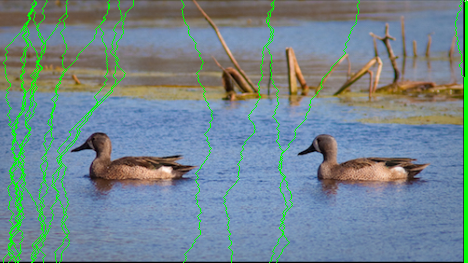

- Những đường màu xanh lá cây chỉ ra những con đường ít quan trọng nhất. Như chúng ta có thể thấy ở đây, nó cẩn thận đi xung quanh những con vịt để đảm bảo rằng các khu vực nổi bậc không bị chạm vào.
- Ở nửa trên của hình ảnh, các đường nối đi xung quanh các nhánh cây để chất lượng được bảo tồn. Về mặt kỹ thuật, cành cây cũng nổi bậc. Nếu chúng ta tiếp tục và loại bỏ 100 đường nối đầu tiên, nó sẽ trông giống như thế này:

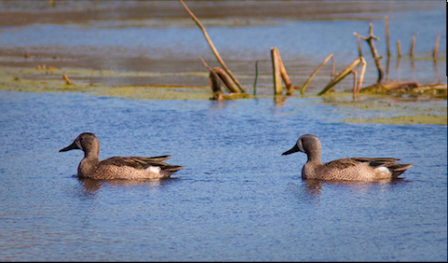

- Bây giờ, so sánh điều này với hình ảnh thay đổi kích thước ngây thơ. Trông nó có đẹp hơn không  Những con vịt trông đẹp hơn trong phiên bản này.

- Dưới đây là chương trình chính thực hiện:

In [ ]:
import sys
import cv2
import numpy as np

# Remove the input vertical seam from the image
def remove_vertical_seam(img, seam):
    rows, cols = img.shape[:2]
    # To delete a point, move every point after it one step towards the left
    for row in range(rows):
        for col in range(int(seam[row]), cols-1):
            img[row, col] = img[row, col+1]
    # Discard the last column to create the final output image
    img = img[:, 0:cols-1]
    return img

if __name__=='__main__':
    # Make sure the size of the input image is reasonable.
    # Large images take a lot of time to be processed.
    # Recommended size is 640x480.
    img_input = cv2.imread('ducks.png')
    
    # Use a small number to get started. Once you get an
    # idea of the processing time, you can use a bigger number.
    # To get started, you can set it to 20.
    num_seams = 20
    
    img = np.copy(img_input)
    img_overlay_seam = np.copy(img_input)
    energy = compute_energy_matrix(img)
    
    for i in range(num_seams):
        seam = find_vertical_seam(img, energy)
        img_overlay_seam = overlay_vertical_seam(img_overlay_seam, seam)
        img = remove_vertical_seam(img, seam)
        energy = compute_energy_matrix(img)
        print('Number of seams removed = ', i+1)
        
    cv2.imshow('Input', img_input)
    cv2.imshow('Seams', img_overlay_seam)
    cv2.imshow('Output', img)
    cv2.imwrite('temp1.png', img_overlay_seam)
    cv2.imwrite('temp2.png', img)
    cv2.waitKey()

- Chúng ta sử dụng **remove_vertical_seam** để xóa các đường nối dọc khỏi hình ảnh gốc, giảm độ rộng của hình ảnh nhưng vẫn giữ nguyên các phần nổi bậc.

## 5. Can we expand an image?

- Chúng ta biết rằng chúng ta có thể sử dụng seam carving để giảm chiều rộng của hình ảnh mà không làm giảm các khu vực đặc trưng.
- Đương nhiên, chúng ta cần tự hỏi mình có thể mở rộng hình ảnh mà không làm xấu đi các khu vực thú vị không. 
- Hóa ra, chúng ta có thể làm điều đó bằng cách sử dụng logic tương tự. **Khi chúng ta tính toán các đường nối, chúng ta chỉ cần thêm một cột thay vì xóa một cột.**

- Nếu chúng ta mở rộng hình ảnh của những con vịt một cách nghĩ đơn thuần nhất, nó sẽ trông giống như thế này:

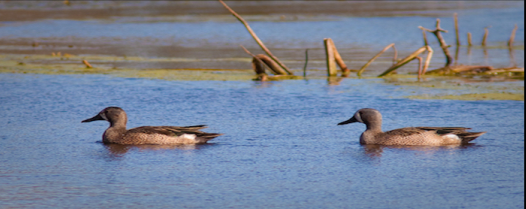

- Nếu chúng ta làm điều đó theo cách thông minh hơn, đó là, bằng cách sử dụng seam carving, nó sẽ trông giống như thế này:

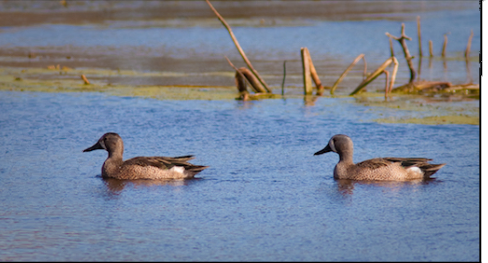

- Như bạn có thể thấy, chiều rộng của hình ảnh đã tăng lên và những con vịt trông không được kéo dài. Sau đây là đoạn code để làm điều đó:

In [ ]:
import sys
import cv2
import numpy as np


# Add a vertical seam to the image
def add_vertical_seam(img, seam, num_iter):
    seam = seam + num_iter
    rows, cols = img.shape[:2]
    zero_col_mat = np.zeros((rows,1,3), dtype=np.uint8)
    img_extended = np.hstack((img, zero_col_mat))
    
    for row in range(rows):
        for col in range(cols, int(seam[row]), -1):
            img_extended[row, col] = img[row, col-1]
            
        # To insert a value between two columns, take the average
        # value of the neighbors. It looks smooth this way and we
        # can avoid unwanted artifacts.
        for i in range(3):
            v1 = img_extended[row, int(seam[row])-1, i]
            v2 = img_extended[row, int(seam[row])+1, i]
            img_extended[row, int(seam[row]), i] = (int(v1)+int(v2))/2
    return img_extended

if __name__=='__main__':
    img_input = cv2.imread('ducks.png')
    num_seams = 20
    img = np.copy(img_input)
    img_output = np.copy(img_input)
    img_overlay_seam = np.copy(img_input)
    energy = compute_energy_matrix(img) # Same than previous code sample
    
    for i in range(num_seams):
        seam = find_vertical_seam(img, energy) # Same than previous code sample
        img_overlay_seam = overlay_vertical_seam(img_overlay_seam, seam)
        img = remove_vertical_seam(img, seam) # Same than previous code sample
        img_output = add_vertical_seam(img_output, seam, i)
        energy = compute_energy_matrix(img)
        print('Number of seams added =', i+1)
        
    cv2.imshow('Input', img_input)    
    cv2.imshow('Seams', img_overlay_seam)
    cv2.imshow('Output', img_output)
    cv2.imwrite('temp.png', img_output)
    cv2.waitKey()

- Trong trường hợp này, chúng ta đã thêm một hàm bổ sung, **add_vertical_seam**. Chúng ta sử dụng nó để thêm các đường nối dọc để hình ảnh trông tự nhiên, thêm các đường nối vào hình ảnh nhằm tăng chiều rộng của nó mà không sửa đổi tỷ lệ ban đầu của các khu vực nổi bậc.

## 6. Can we remove an object completely?

- Đây có lẽ là **ứng dụng thú vị nhất** của seam carving. Chúng ta có thể làm cho một đối tượng hoàn toàn biến mất khỏi một hình ảnh. Hãy xem hình ảnh sau đây:

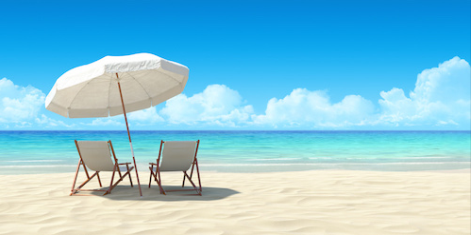

- Kèm theo vùng để xóa bằng chuột của bạn:

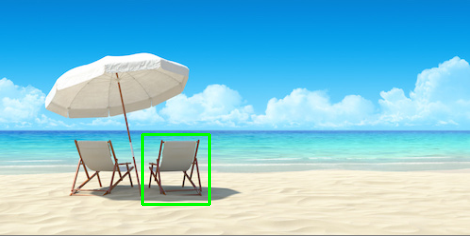

- Sau khi bạn xóa ghế bên phải, nó sẽ trông giống như thế này:

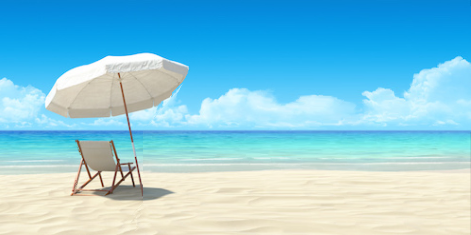

- Như thể chiếc ghế không bao giờ tồn tại! Trước khi chúng ta xem code, điều quan trọng là phải biết rằng việc này cần một chút thời gian để chạy. Vì vậy, chỉ cần chờ vài phút để có ý tưởng về thời gian xử lý. Bạn có thể điều chỉnh kích thước hình ảnh đầu vào cho phù hợp! Chúng ta hãy xem code nhé:

In [ ]:
import sys
import cv2
import numpy as np

# Draw vertical seam on top of the image
def overlay_vertical_seam(img, seam):
    img_seam_overlay = np.copy(img)
    # Extract the list of points from the seam
    x_coords, y_coords = np.transpose([(i,int(j)) for i,j in enumerate(seam)])
    # Draw a green line on the image using the list of points
    img_seam_overlay[x_coords, y_coords] = (0,255,0)
    return img_seam_overlay

# Compute the energy matrix from the input image
def compute_energy_matrix(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Compute X derivative of the image
    sobel_x = cv2.Sobel(gray,cv2.CV_64F, 1, 0, ksize=3)
    
    # Compute Y derivative of the image
    sobel_y = cv2.Sobel(gray,cv2.CV_64F, 0, 1, ksize=3)
    
    abs_sobel_x = cv2.convertScaleAbs(sobel_x)
    abs_sobel_y = cv2.convertScaleAbs(sobel_y)
    
    # Return weighted summation of the two images i.e. 0.5*X + 0.5*Y
    return cv2.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)

# Find vertical seam in the input image
def find_vertical_seam(img, energy):
    rows, cols = img.shape[:2]
    # Initialize the seam vector with 0 for each element
    seam = np.zeros(img.shape[0])
    # Initialize distance and edge matrices
    dist_to = np.zeros(img.shape[:2]) + float('inf')
    dist_to[0,:] = np.zeros(img.shape[1])
    edge_to = np.zeros(img.shape[:2])
    
    # Dynamic programming; iterate using double loop and compute the paths efficiently
    for row in range(rows-1):
        for col in range(cols):
            if col != 0 and dist_to[row+1, col-1] > dist_to[row, col] + energy[row+1, col-1]:
                dist_to[row+1, col-1] = dist_to[row, col] + energy[row+1, col-1]
                edge_to[row+1, col-1] = 1
                
                if dist_to[row+1, col] > dist_to[row, col] + energy[row+1, col]:
                    dist_to[row+1, col] = dist_to[row, col] + energy[row+1, col]
                    
                edge_to[row+1, col] = 0
                if col != cols-1 and dist_to[row+1, col+1] > dist_to[row, col] + energy[row+1, col+1]:
                    dist_to[row+1, col+1] = dist_to[row, col] + energy[row+1, col+1]
                    edge_to[row+1, col+1] = -1
    # Retracing the path
    # Returns the indices of the minimum values along X axis.
    seam[rows-1] = np.argmin(dist_to[rows-1, :])
    for i in (x for x in reversed(range(rows)) if x > 0):
        seam[i-1] = seam[i] + edge_to[i, int(seam[i])]
    return seam

def remove_vertical_seam(img, seam):
    rows, cols = img.shape[:2]
    # To delete a point, move every point after it one step towards the left
    for row in range(rows):
        for col in range(int(seam[row]), cols-1):
            img[row, col] = img[row, col+1]
    # Discard the last column to create the final output image
    img = img[:, 0:cols-1]
    return img

# Add a vertical seam to the image
def add_vertical_seam(img, seam, num_iter):
    seam = seam + num_iter
    rows, cols = img.shape[:2]
    zero_col_mat = np.zeros((rows,1,3), dtype=np.uint8)
    img_extended = np.hstack((img, zero_col_mat))
    
    for row in range(rows):
        for col in range(cols, int(seam[row]), -1):
            img_extended[row, col] = img[row, col-1]
            
        # To insert a value between two columns, take the average
        # value of the neighbors. It looks smooth this way and we
        # can avoid unwanted artifacts.
        for i in range(3):
            v1 = img_extended[row, int(seam[row])-1, i]
            v2 = img_extended[row, int(seam[row])+1, i]
            img_extended[row, int(seam[row]), i] = (int(v1)+int(v2))/2
    return img_extended

# Draw rectangle on top of the input image
def draw_rectangle(event, x, y, flags, params):
    global x_init, y_init, drawing, top_left_pt, bottom_right_pt, img_orig
    
    # Detecting a mouse click
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        x_init, y_init = x, y
    # Detecting mouse movement
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            top_left_pt, bottom_right_pt = (x_init,y_init), (x,y)
            img[y_init:y, x_init:x] = 255 - img_orig[y_init:y, x_init:x]
            cv2.rectangle(img, top_left_pt, bottom_right_pt, (0,255,0), 2)
    
    # Detecting the mouse button up event
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        top_left_pt, bottom_right_pt = (x_init,y_init), (x,y)
        
        # Create the "negative" film effect for the selected region
        img[y_init:y, x_init:x] = 255 - img[y_init:y, x_init:x]
        
        # Draw rectangle around the selected region
        cv2.rectangle(img, top_left_pt, bottom_right_pt, (0,255,0), 2)
        rect_final = (x_init, y_init, x-x_init, y-y_init)
        
        # Remove the object in the selected region
        remove_object(img_orig, rect_final)

# Computing the energy matrix using modified algorithm
def compute_energy_matrix_modified(img, rect_roi):
    # Compute weighted summation i.e. 0.5*X + 0.5*Y
    energy_matrix = compute_energy_matrix(img)
    x,y,w,h = rect_roi
    
    # We want the seams to pass through this region, so make sure the energy values in this region are set to 0
    energy_matrix[y:y+h, x:x+w] = 0
    
    return energy_matrix

# Remove the object from the input region of interest
def remove_object(img, rect_roi):
    num_seams = rect_roi[2] + 10
    energy = compute_energy_matrix_modified(img, rect_roi)
    
    # Start a loop and rsemove one seam at a time
    for i in range(num_seams):
        # Find the vertical seam that can be removed
        seam = find_vertical_seam(img, energy)
        
        # Remove that vertical seam
        img = remove_vertical_seam(img, seam)
        x,y,w,h = rect_roi
        
        # Compute energy matrix after removing the seam
        energy = compute_energy_matrix_modified(img, (x,y,w-i,h))
        print('Number of seams removed =', i+1)
    
    img_output = np.copy(img)
    
    # Fill up the region with surrounding values so that the size
    # of the image remains unchanged
    for i in range(num_seams):
        seam = find_vertical_seam(img, energy)
        img = remove_vertical_seam(img, seam)
        img_output = add_vertical_seam(img_output, seam, i)
        energy = compute_energy_matrix(img)
        print('Number of seams added =', i+1)
    
    cv2.imshow('Input', img_input)
    cv2.imshow('Output', img_output)
    cv2.imwrite('temp.png', img_output)
    cv2.waitKey()

if __name__=='__main__':
    img_input = cv2.imread('beach.png')
    drawing = False
    img = np.copy(img_input)
    img_orig = np.copy(img_input)
    
    cv2.namedWindow('Input')
    cv2.setMouseCallback('Input', draw_rectangle)
    print('Draw a rectangle with the mouse over the object to be removed')
    while True:
        cv2.imshow('Input', img)
        c = cv2.waitKey(10)
        if c == 27:
            break
            
    cv2.destroyAllWindows()
        

Draw a rectangle with the mouse over the object to be removed
Number of seams removed = 1
Number of seams removed = 2
Number of seams removed = 3
Number of seams removed = 4
Number of seams removed = 5
Number of seams removed = 6
Number of seams removed = 7
Number of seams removed = 8
Number of seams removed = 9
Number of seams removed = 10
Number of seams removed = 11
Number of seams removed = 12
Number of seams removed = 13
Number of seams removed = 14
Number of seams removed = 15
Number of seams removed = 16
Number of seams removed = 17
Number of seams removed = 18
Number of seams removed = 19
Number of seams removed = 20
Number of seams removed = 21
Number of seams removed = 22
Number of seams removed = 23
Number of seams removed = 24
Number of seams removed = 25
Number of seams removed = 26
Number of seams removed = 27
Number of seams removed = 28
Number of seams removed = 29
Number of seams removed = 30
Number of seams removed = 31
Number of seams removed = 32
Number of seams rem

### How did we do it?

- Cơ bản về mặc tư duy vẫn giống như trước đó. Chúng ta sử dụng seam curving để loại bỏ một đối tượng.
- Khi chúng ta chọn khu vực quan tâm, chúng ta thực hiện tất cả các đường nối đi qua khu vực này
- Chúng ta làm điều này bằng cách nhân ma trận energy sau mỗi lần lặp. Chúng ta đã thêm một hàm mới gọi là **compute_energy_matrix_modified** để đạt được điều này.
- Khi chúng ta tính toán **energy matrix**, chúng ta gán giá trị bằng 0 cho vùng quan tâm này. Bằng cách này, chúng ta buộc tất cả các đường nối đi qua khu vực này. Sau khi chúng ta xóa tất cả các đường nối liên quan đến vùng này, chúng ta tiếp tục thêm các đường nối cho đến khi chúng ta mở rộng hình ảnh về chiều rộng ban đầu.

## Kết luận

- Trong chương này, chúng ta đã tìm hiểu về thay đổi kích thước hình ảnh nhận biết nội dung. 
- Chúng ta đã thảo luận làm thế nào để định lượng các khu vực thú vị và không thú vị trong một hình ảnh. 
- Chúng ta đã học cách tính toán các đường nối trong một hình ảnh và cách sử dụng lập trình động để thực hiện nó một cách hiệu quả. 
- Chúng ta đã thảo luận về cách sử dụng khắc đường may để giảm độ rộng của hình ảnh và cách chúng tôi có thể sử dụng cùng logic để mở rộng hình ảnh.
- Chúng ta cũng học cách loại bỏ hoàn toàn một đối tượng khỏi hình ảnh.
- **Trong chương tiếp theo, chúng ta sẽ thảo luận về cách thực hiện phân tích hình dạng và phân đoạn hình ảnh. Chúng ta sẽ thấy cách sử dụng các nguyên tắc đó để tìm ranh giới chính xác của một đối tượng quan tâm trong một hình ảnh.**